In [2]:
import numpy as np
from math import comb
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("darkgrid")

In [3]:
class Encoder:
  def __init__(self, cwd_lenght, p):
    """
    INPUTS:
    cwd_length: the length of a output code word
    p: the probability of 1's in the output/desired distribution
    """
    self.cwd_length = cwd_lenght
    self.num_1 = cwd_lenght * p
    self.num_0 = cwd_lenght - self.num_1
    # code book length
    self.cb_length = comb(int(self.cwd_length), int(self.num_1))
    
    self.input_length = np.floor(np.log2(self.cb_length))
    if float(self.num_0).is_integer() == False or float(self.num_1).is_integer() == False:
      raise Exception("Number or zeros/ones not integer!")
  
  def generate_codebook(self):
    pass


  def encode(self, input_bits):
    """
    INPUT:
    input_bits: a string of bits you want to encode

    OUTPUT:
    encoded: a string of encoded inputs 
    """

    num0 = self.num_0
    num1 = self.num_1
    input = list(map(int, input_bits))
    self.check_input(input)
    
    # First calculate the input bounds
    input_lo = 0
    input_hi = 1
    for i in range(len(input)):
      interval = input_hi - input_lo
      mid = input_lo + interval / 2
      if input[i] == 0:
        input_hi = mid
      else:
        input_lo = mid
    # print(input_lo, ", ", input_hi)

    # Now, encode the inputs
    encoded = []
    encode_lo = 0
    encode_hi = 1
    while len(encoded) != self.cwd_length:

      # Case 0: if we want to map to extreme distributions
      if num0 == 0 or num1 == 0:
        encoded.extend(int(num0) * [0] + int(num1) * [1])
        break
      
      encode_interval = encode_hi - encode_lo
      threshold = encode_lo + (num0 / (num0 + num1)) * encode_interval
      
      # Case 1: input_hi is smaller or equal to thres
      if input_hi <= threshold:
        # Successfully encoded a 0
        encoded.append(0)
        # Change bounds
        encode_hi = threshold
        # Update pocket
        num0 -= 1

      # Case 2: input_lo is greater of equal to thres
      elif input_lo >= threshold:
        # Successfully encoded a 1
        encoded.append(1)
        # Change bounds
        encode_lo = threshold
        # Update pocket
        num1 -= 1

      # Case 3: left interval is within the right bounds
      else:
        if input_hi == encode_hi and input_lo <= threshold:
          encoded.append(1) # Updata encoded list
          encode_lo = threshold # Change bounds
          num1 -= 1 # Update pocket
        elif input_lo == encode_lo and input_hi >= threshold:
          encoded.append(0) # Updata encoded list
          encode_hi = threshold # Change bounds
          num0 -= 1 # Update pocket
        else: # "straddle case"
          encoded.append(1)
          encode_lo = threshold
          num1 -= 1
      # print(str(encoded))
    encoded = ' '.join([str(elem) for elem in encoded])
    encoded = encoded.replace(" ", "")
    return encoded

  def check_input(self, input):
    # Cannot exceed or drop below self.input_length
    if len(input) != self.input_length:
      if len(input) == 0:
        raise Exception("Empty Input!")
      raise Exception("Incongruent Input Size! It should be: ", self.input_length)

    # Cannot contain bits other than 0 or 1
    thisset = set(input)
    thisset.discard(0)
    thisset.discard(1)
    if len(thisset) != 0:
      raise Exception("Inputs bits contain elements other than 0 or 1")


# Testing
ecd = Encoder(4, 1/2)
assert ecd.encode("00") == '0011'
assert ecd.encode("01") == '0110'
assert ecd.encode("10") == '1001'
assert ecd.encode("11") == '1100'


ecd4 = Encoder(4, 1/4)
assert ecd4.encode("00") == '0001'
assert ecd4.encode("01") == '0010'
assert ecd4.encode("10") == '0100'
assert ecd4.encode("11") == '1000'


ecd5 = Encoder(4, 3/4)
assert ecd5.encode("00") == '0111'
assert ecd5.encode("01") == '1011'
assert ecd5.encode("10") == '1101'
assert ecd5.encode("11") == '1110'


ecd2 = Encoder(5, 3/5)
assert ecd2.encode("000") == '00111'
assert ecd2.encode("001") == '01101'
assert ecd2.encode("100") == '10101'
assert ecd2.encode("101") == '11001'
assert ecd2.encode("110") == '11010'
assert ecd2.encode("111") == '11100'


ecd6 = Encoder(5, 2/5)
assert ecd6.encode("000") == '00011'
assert ecd6.encode("001") == '00110'
assert ecd6.encode("100") == '10001'
assert ecd6.encode("101") == '10010'
assert ecd6.encode("110") == '10100'
assert ecd6.encode("111") == '11000'


ecd3 = Encoder(8, 3/8) # three 1's, five 0's
assert ecd3.encode("11100") == '11000001'
assert ecd3.encode("10110") == '10001100'

print("All tests passed")

All tests passed


In [4]:
encoded = [0, 0, 1, 1]
encoded = ' '.join([str(elem) for elem in encoded])
encoded.replace(" ", "")

'0011'

In [5]:
class CCDM:
  def __init__(self, cwd_lenght, p):
    """
    INPUTS:
    cwd_length: the length of a output code word
    p: the probability of 1's in the output/desired distribution
    """
    self.cwd_length = cwd_lenght
    self.num_1 = cwd_lenght * p
    self.num_0 = cwd_lenght - self.num_1
    # code book length
    self.cb_length = comb(int(self.cwd_length), int(self.num_1))
    
    self.input_length = np.floor(np.log2(self.cb_length))
    if float(self.num_0).is_integer() == False or float(self.num_1).is_integer() == False:
      raise Exception("Number or zeros/ones not integer!")
  
  def generate_codebook(self):
    pass


  def encode(self, input_bits):
    """
    INPUT:
    input_bits: a string of bits you want to encode

    OUTPUT:
    encoded: a string of encoded inputs 
    """

    num0 = self.num_0
    num1 = self.num_1
    input = list(map(int, input_bits))
    self.check_input(input)
    
    # First calculate the input bounds
    input_lo = 0
    input_hi = 1
    for i in range(len(input)):
      interval = input_hi - input_lo
      mid = input_lo + interval / 2
      if input[i] == 0:
        input_hi = mid
      else:
        input_lo = mid
    # print(input_lo, ", ", input_hi)

    # Now, encode the inputs
    encoded = []
    encode_lo = 0
    encode_hi = 1
    while len(encoded) != self.cwd_length:

      # Case 0: if we want to map to extreme distributions
      if num0 == 0 or num1 == 0:
        encoded.extend(int(num0) * [0] + int(num1) * [1])
        break
      
      encode_interval = encode_hi - encode_lo
      threshold = encode_lo + (num0 / (num0 + num1)) * encode_interval
      
      # Case 1: input_hi is smaller or equal to thres
      if input_hi <= threshold:
        # Successfully encoded a 0
        encoded.append(0)
        # Change bounds
        encode_hi = threshold
        # Update pocket
        num0 -= 1

      # Case 2: input_lo is greater of equal to thres
      elif input_lo >= threshold:
        # Successfully encoded a 1
        encoded.append(1)
        # Change bounds
        encode_lo = threshold
        # Update pocket
        num1 -= 1

      # Case 3: left interval is within the right bounds
      else:
        if input_hi == encode_hi and input_lo <= threshold:
          encoded.append(1) # Updata encoded list
          encode_lo = threshold # Change bounds
          num1 -= 1 # Update pocket
        elif input_lo == encode_lo and input_hi >= threshold:
          encoded.append(0) # Updata encoded list
          encode_hi = threshold # Change bounds
          num0 -= 1 # Update pocket
        else: # "straddle case"
          encoded.append(1)
          encode_lo = threshold
          num1 -= 1
    encoded = ' '.join([str(elem) for elem in encoded])
    encoded = encoded.replace(" ", "")
    return encoded
  
  def decode(self, msg):
    """
    INPUT:
    msg: message need to decode in string

    OUTPUT:
    Decoded: a string of decoded input.

    """
    encoded = list(map(int, msg))
    num0 = encoded.count(0)
    num1 = encoded.count(1)

    # If the message is incongruous or does not apply to this DM
    self.check_msg(encoded, num0)

    decode_lo = 0
    decode_hi = 1
    
    for i in range(len(encoded)):
      decode_interval = decode_hi - decode_lo
      threshold = decode_lo + (num0 / (num0 + num1)) * decode_interval

      if encoded[i] == 0:
        # Update bounds
        decode_hi = threshold
        # Update pocket
        num0 -= 1
      else:
        # Update bounds
        decode_lo = threshold
        # Update pocket
        num1 -= 1
      
    # print(decode_lo, decode_hi)

    decimal = decode_lo // (1/2 ** self.input_length)
    # print(decimal)
    binary = format(int(decimal), "b")
    
    if len(str(binary)) != self.input_length:
      binary = ("0" * int(self.input_length - len(str(binary))) + str(binary))
    # print(binary)
    decoded = binary

    
    return(str(decoded))



  def check_msg(self, encoded, num0):
    if len(encoded) != self.cwd_length:
      if len(encoded) == 0:
        raise Exception("Empty Message!")
      raise Exception("Incongruent Message Size!")
    
    # Message not following desired distribution
    if num0 != self.num_0:
      raise Exception("Message not following desired distribution!")
    
    # Cannot contain bits other than 0 or 1
    thisset = set(encoded)
    thisset.discard(0)
    thisset.discard(1)
    if len(thisset) != 0:
      raise Exception("Message bits contain elements other than 0 or 1")

  def check_input(self, input):
    # Cannot exceed or drop below self.input_length
    if len(input) != self.input_length:
      if len(input) == 0:
        raise Exception("Empty Input!")
      raise Exception("Incongruent Input Size! It should be: ", self.input_length)

    # Cannot contain bits other than 0 or 1
    thisset = set(input)
    thisset.discard(0)
    thisset.discard(1)
    if len(thisset) != 0:
      raise Exception("Inputs bits contain elements other than 0 or 1")


dm1 = CCDM(4, 1/2)
assert dm1.encode("00") == '0011'
assert dm1.encode("01") == '0110'
assert dm1.encode("10") == '1001'
assert dm1.encode("11") == '1100'

assert dm1.decode("0011") == '00'
assert dm1.decode("0110") == '01'
assert dm1.decode("1001") == '10'
assert dm1.decode("1100") == '11'

dm2 = CCDM(4, 1/4)
assert dm2.encode("00") == '0001'
assert dm2.encode("01") == '0010'
assert dm2.encode("10") == '0100'
assert dm2.encode("11") == '1000'

assert dm2.decode("0001") == '00'
assert dm2.decode("0010") == '01'
assert dm2.decode("0100") == '10'
assert dm2.decode("1000") == '11'

dm3 = CCDM(5, 3/5)
assert dm3.encode("000") == '00111'
assert dm3.encode("001") == '01101'
assert dm3.encode("100") == '10101'
assert dm3.encode("101") == '11001'
assert dm3.encode("110") == '11010'
assert dm3.encode("111") == '11100'

assert dm3.decode("00111") == '000'
assert dm3.decode("01101") == '001'
assert dm3.decode("10101") == '100'
assert dm3.decode("11001") == '101'
assert dm3.decode("11010") == '110'
assert dm3.decode("11100") == '111'

dm4 = CCDM(8, 3/8) # three 1's, five 0's
assert dm4.encode("11100") == '11000001'
assert dm4.encode("10110") == '10001100'

assert dm4.decode("11000001") == '11100'
assert dm4.decode("10001100") == '10110'


print("All tests passed")

All tests passed


In [6]:
cs = 0
for i in range(0, 20):
  cs += comb(41, i)

cs > comb(41, 20)

True

output bits: 8
desired distribution: 0.8743

ol, num1   available_cwds   cb_length(MCDM)
(8,  8)    1                1
(8,  7)    8                8 (1 + 7)
(8,  6)    28               32 (1 + 8 + 23)
(8,  5)    56               64 (1 + 8 + 28 + 27)
(8,  4)    70               128 (1 + 8 + 28 + 56 + 35)   
(8,  3)    56               128 (1 + 8 + 28 + 56 + 35)
(8,  2)    28               128
(8,  1)    8                128
(n,  p)    x                256 (1 + 8 + 28 + 56 + 70 + 56 + 28 + 8 + 256 - x)

(5,  5)    1                1




(8,  8)    1                1
(8,  7)    8                8 (1 + 7)
(8,  6)    16               16 (1 + 8 + 7)
(8,  5)    32               32 (1 + 8 + 16 + 7)
(8,  4)    64               64 (1 + 8 + 16 + 32 + 7)
(8,  3)    32               64 ()
(8,  2)    16               

(40, 18)                    x-y
(40, 19)                    x
(40, 20)                    x
(40, 21)
(40, 22)


(5,  1)




In [7]:
class Optimizer:
  def __init__(self, method, plot, rate_restraint=None):
    self.method = method
    self.plot = plot
    self.rate = rate_restraint

  def optimize(self, output_length, p):
    # If the method of optimization is probability
    if self.method == "Probability":
      KL_list = []
      matching_rate_list = []
      numCCDMs = 1
      num1 = 0
      cb_length = 0
      available_cwds = 0
      single_cb_length = []
      while numCCDMs <= (output_length+1):

        num1 = 0
        # Keep track of num1, cb_length, and available_cwds
        
        available_cwds += 2 ** (np.floor(np.log2(float(comb(output_length, numCCDMs-1)))))
        single_cb_length.append(2 ** (np.floor(np.log2(float(comb(output_length, numCCDMs-1))))))

        # Update only if MCDM codebook expands
        if np.floor(np.log2(available_cwds)) > np.log2(cb_length):
          # added_cwds = 2 ** (np.floor(np.log2(available_cwds + cb_length))) - cb_length
          cb_length = 2 ** (np.floor(np.log2(available_cwds))) # Update
          temp_cb_length = cb_length
          for mini_cb in range(len(single_cb_length)):
            if single_cb_length[mini_cb] <= temp_cb_length:
              if p > 0.5: ## Start from all 1's
                num1 += single_cb_length[mini_cb] * (output_length - mini_cb)
              else:
                num1 += single_cb_length[mini_cb] * mini_cb
              temp_cb_length -= single_cb_length[mini_cb]
            else:
              if p > 0.5:
                num1 += temp_cb_length * (output_length - mini_cb)
              else:
                num1 += temp_cb_length * mini_cb
              break
          
          empirical_ones_prob = num1 / (output_length * cb_length)
          # Calculate Normalized KL
          temp_KL = self.Normalized_KL(output_length=output_length, cb_length=cb_length, empirical_ones=empirical_ones_prob, desired_ones=p)
          KL_list.append(temp_KL) # Append results to a list
          matching_rate_list.append(np.log2(float(cb_length)) / output_length)
        
        else: ## If not update
          KL_list.append(KL_list[numCCDMs - 2])
          matching_rate_list.append(matching_rate_list[numCCDMs - 2])
          
        numCCDMs += 1  # Update iterator

      # print(KL_list)

      # Plotting functionality
      if self.plot == True:
        lowest_KL = np.argsort(KL_list)[0]
        plt.figure(figsize=(8,6))
        plt.plot(np.arange(1, len(KL_list)+1), KL_list, marker='o', label="Highest Probability")
        plt.plot(lowest_KL+1, KL_list[lowest_KL], marker='x', markersize=20)
        plt.title("Normalized Divergence Using Highest Probability")
        plt.xlabel("Number of CCDMs")
        plt.ylabel("Normalized KL-Divergence")
        plt.legend()
      
      # Return the lowest KL
      if self.rate == None:
        return min(KL_list), matching_rate_list[np.argmin(KL_list)]
      else:
        # Indices for available number of CCDMs 
        indices = list(np.where(np.array(matching_rate_list) == self.rate)[0])
        minKL = KL_list[indices[0]]
        for index in indices:
          if KL_list[index] < minKL:
            minKL = KL_list[index]
        return minKL

    # If the method of optimization is KL-Divergence
    elif self.method == "KL-Divergence":
      KL_list = []

      # tuple 
      target_num1_float = output_length * p # The best-fit distribution
      descend_num1 = np.argsort(np.abs(np.arange(0, output_length+1) - target_num1_float)) # Rank the CCDMs based on distribution-distance (similarity)
      print(descend_num1)

      numCCDMs = 1
      matching_rate_list = []
      num1 = 0
      cb_length = 0
      available_cwds = 0
      single_cb_length = []
      while numCCDMs <= (output_length+1):

        num1 = 0
        # Keep track of num1, cb_length, and available_cwds
        
        available_cwds += 2 ** (np.floor(np.log2(float(comb(output_length, descend_num1[numCCDMs-1])))))
        single_cb_length.append(2 ** (np.floor(np.log2(float(comb(output_length, descend_num1[numCCDMs-1]))))))

        # Update only if MCDM codebook expands
        if np.floor(np.log2(available_cwds)) > np.log2(cb_length):
          # added_cwds = 2 ** (np.floor(np.log2(available_cwds + cb_length))) - cb_length
          cb_length = 2 ** (np.floor(np.log2(available_cwds))) # Update
          temp_cb_length = cb_length
          for mini_cb in range(len(single_cb_length)):
            if single_cb_length[mini_cb] <= temp_cb_length:
              num1 += single_cb_length[mini_cb] * descend_num1[mini_cb]
              temp_cb_length -= single_cb_length[mini_cb]
            else:
              num1 += temp_cb_length * descend_num1[mini_cb]
              break
          
          empirical_ones_prob = num1 / (output_length * cb_length)
          # Calculate Normalized KL
          temp_KL = self.Normalized_KL(output_length=output_length, cb_length=cb_length, empirical_ones=empirical_ones_prob, desired_ones=p)
          KL_list.append(temp_KL) # Append results to a list
          matching_rate_list.append(np.log2(float(cb_length))/ output_length)

        else: ## If not update
          KL_list.append(KL_list[numCCDMs - 2])
          matching_rate_list.append(matching_rate_list[numCCDMs - 2])
          
        numCCDMs += 1  # Update iterator
        # print(KL_list)

      # Plotting functionality
      if self.plot == True:
        lowest_KL = np.argsort(KL_list)[0]
        plt.figure(figsize=(8, 6))
        plt.plot(np.arange(1, len(KL_list)+1), KL_list, marker='o', label="Typical Set")
        plt.plot(lowest_KL+1, KL_list[lowest_KL], marker='x', markersize=20)
        # plt.grid(color='r', linestyle='-', linewidth=2)
        plt.title("Normalized Divergence Using Typical Set")
        plt.xlabel("Number of CCDMs")
        plt.ylabel("Normalized KL-Divergence")
        plt.legend()


      # Return the lowest KL
      if self.rate == None:
        return min(KL_list), matching_rate_list[np.argmin(KL_list)]
      else:
        # Indices for available number of CCDMs 
        indices = list(np.where(np.array(matching_rate_list) == self.rate)[0])
        minKL = KL_list[indices[0]]
        print("The codebook length for MCDM-TS is", cb_length)
        for index in indices:
          if KL_list[index] < minKL:
            minKL = KL_list[index]
        return minKL
        
    else:
      raise Exception("Wrong Optimizor Initialization")



  def Normalized_KL(self, output_length, cb_length, empirical_ones, desired_ones):
    """
    INPUT:
    output_length: number of bits in the ouptut of a MCDM
    cb_length: codebook length
    empirical_ones 
    
    """
    ft = -np.log2(np.abs(cb_length))/output_length
    if empirical_ones == 0.0:
      st = (1.0 - empirical_ones) * np.log2(1.0/(1.0 - empirical_ones))
      tt = (1.0 - empirical_ones) * np.log2((1.0 - empirical_ones)/(1.0 - desired_ones))
    elif empirical_ones == 1.0:
      st = empirical_ones * np.log2(1.0/empirical_ones)
      tt = empirical_ones * np.log2(empirical_ones/desired_ones)
    else:
      st = (1.0 - empirical_ones) * np.log2(1.0/(1.0 - empirical_ones)) + empirical_ones * np.log2(1.0/empirical_ones)
      tt = (1.0 - empirical_ones) * np.log2((1.0 - empirical_ones)/(1.0 - desired_ones)) + empirical_ones * np.log2(empirical_ones/desired_ones)

    if ft + st + tt <= 0:
      print("warning")
    return ft + st + tt

### CCDM
output_length = 60
target_dis = 0.25
# Number of 1's in a single codeword
num1 = round(output_length * target_dis)
# Empirical Distribution
empirical_dis = num1 / output_length
# Number of codewords
cb_length = 2 ** (np.floor(np.log2(float(comb(output_length, num1)))))
print("The codebook length for a CCDM is ", cb_length)

matching_rate = (np.log2(cb_length)) / output_length

optim = Optimizer("KL-Divergence", False, matching_rate)
print(optim.optimize(output_length=60, p=0.25))

optim2 = Optimizer("Probability", False)
print(optim2.optimize(output_length=40, p=0.8794))

The codebook length for a CCDM is  35184372088832.0
[15 14 16 17 13 12 18 11 19 10 20  9 21  8 22  7 23  6 24  5 25 26  4 27
  3  2 28 29  1  0 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60]
The codebook length for MCDM-TS is 5.764607523034235e+17
0.06127812445913283
(0.05727021050961532, 0.475)


/var/folders/d2/ftfz21xx3314swsw80q2rlnh0000gn/T/ipykernel_1296/377567407.py:105: RuntimeWarning: divide by zero encountered in log2
  if np.floor(np.log2(available_cwds)) > np.log2(cb_length):
/var/folders/d2/ftfz21xx3314swsw80q2rlnh0000gn/T/ipykernel_1296/377567407.py:26: RuntimeWarning: divide by zero encountered in log2
  if np.floor(np.log2(available_cwds)) > np.log2(cb_length):


x-axis : input_bits
y-axis : 



xp start location

verify with calculation

In [3]:
def Normalized_KL(output_length, cb_length, empirical_ones, desired_ones):
  """
  INPUT:
  output_length: number of bits in the ouptut of a MCDM
  cb_length: codebook length
  empirical_ones 
  
  """
  ft = -np.log2(np.abs(cb_length))/output_length
  if empirical_ones == 0.0:
    st = (1.0 - empirical_ones) * np.log2(1.0/(1.0 - empirical_ones))
    tt = (1.0 - empirical_ones) * np.log2((1.0 - empirical_ones)/(1.0 - desired_ones))
  elif empirical_ones == 1.0:
    st = empirical_ones * np.log2(1.0/empirical_ones)
    tt = empirical_ones * np.log2(empirical_ones/desired_ones)
  else:
    st = (1.0 - empirical_ones) * np.log2(1.0/(1.0 - empirical_ones)) + empirical_ones * np.log2(1.0/empirical_ones)
    tt = (1.0 - empirical_ones) * np.log2((1.0 - empirical_ones)/(1.0 - desired_ones)) + empirical_ones * np.log2(empirical_ones/desired_ones)
  return ft + st + tt

/var/folders/d2/ftfz21xx3314swsw80q2rlnh0000gn/T/ipykernel_60968/1809691694.py:26: RuntimeWarning: divide by zero encountered in log2
  if np.floor(np.log2(available_cwds)) > np.log2(cb_length):
/var/folders/d2/ftfz21xx3314swsw80q2rlnh0000gn/T/ipykernel_60968/1809691694.py:105: RuntimeWarning: divide by zero encountered in log2
  if np.floor(np.log2(available_cwds)) > np.log2(cb_length):


The codebook length for MCDM-TS is 512.0
The codebook length for MCDM-TS is 524288.0
The codebook length for MCDM-TS is 536870912.0
The codebook length for MCDM-TS is 549755813888.0
The codebook length for MCDM-TS is 562949953421312.0
The codebook length for MCDM-TS is 5.764607523034235e+17
The codebook length for MCDM-TS is 5.902958103587057e+20
The codebook length for MCDM-TS is 6.044629098073146e+23
The codebook length for MCDM-TS is 6.189700196426902e+26
The codebook length for MCDM-TS is 6.338253001141147e+29
The codebook length for MCDM-TS is 8.034690221294951e+59
The codebook length for MCDM-TS is 1.018517988167243e+90
The codebook length for MCDM-TS is 1.2911249390434543e+120
The codebook length for MCDM-TS is 1.636695303948071e+150
The codebook length for MCDM-TS is 2.0747577844404965e+180
The codebook length for MCDM-TS is 2.630067950774187e+210
The codebook length for MCDM-TS is 3.334007216439927e+240
The codebook length for MCDM-TS is 4.226356249085322e+270
The codebook len

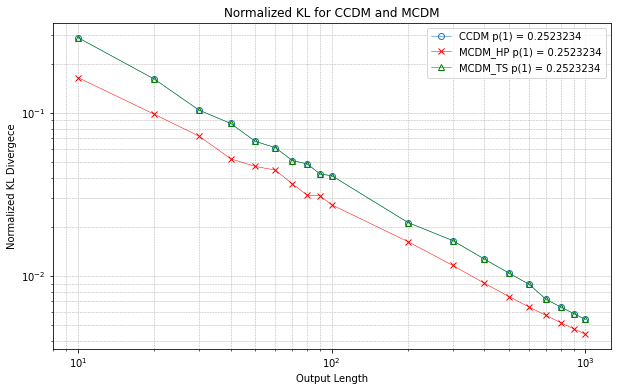

In [63]:
target_dis = 0.2523234
CCDM_KL = []
MCDM_HP = []
MCDM_TS = []
x_axis = np.concatenate((np.arange(10, 100, 10), np.arange(100, 1100, 100)), axis=0)
for x in x_axis: # For the x range (output_length)
  output_length = x
  ### CCDM

  # Number of 1's in a single codeword
  num1 = round(output_length * target_dis)
  # Empirical Distribution
  empirical_dis = num1 / output_length
  # Number of codewords
  cb_length = 2 ** (np.floor(np.log2(float(comb(output_length, num1)))))
  # Calculate Normalized KL
  CCDM_KL.append(Normalized_KL(output_length, cb_length, empirical_dis, target_dis))

  matching_rate = (np.log2(cb_length)) / output_length

  ## MCDM with HP
  optim_HP = Optimizer("Probability", False, matching_rate)
  MCDM_HP.append(optim_HP.optimize(output_length=output_length, p=target_dis))

  ### MCDM with TS
  optim_TS = Optimizer("KL-Divergence", False, matching_rate)
  MCDM_TS.append(optim_TS.optimize(output_length=output_length, p=target_dis))
# print(CCDM_KL)
plt.figure(figsize=(10, 6))
plt.loglog(x_axis, CCDM_KL, linewidth=0.5, marker='o', markerfacecolor='none', label='CCDM p(1) = {target_dis}'.format(target_dis=target_dis))
plt.loglog(x_axis, MCDM_HP, c='r', linewidth=0.5,  marker='x', markerfacecolor='none', label='MCDM_HP p(1) = {target}'.format(target=target_dis))
plt.loglog(x_axis, MCDM_TS, c='green', linewidth=0.5, marker='^', markerfacecolor='none', label='MCDM_TS p(1) = {target}'.format(target=target_dis))
plt.xlabel("Output Length")
plt.ylabel("Normalized KL Divergece")
plt.title("Normalized KL for CCDM and MCDM")
plt.grid(linestyle='--', linewidth=0.5, which='both')
plt.legend()

/var/folders/d2/ftfz21xx3314swsw80q2rlnh0000gn/T/ipykernel_60968/1809691694.py:26: RuntimeWarning: divide by zero encountered in log2
  if np.floor(np.log2(available_cwds)) > np.log2(cb_length):
/var/folders/d2/ftfz21xx3314swsw80q2rlnh0000gn/T/ipykernel_60968/1809691694.py:105: RuntimeWarning: divide by zero encountered in log2
  if np.floor(np.log2(available_cwds)) > np.log2(cb_length):


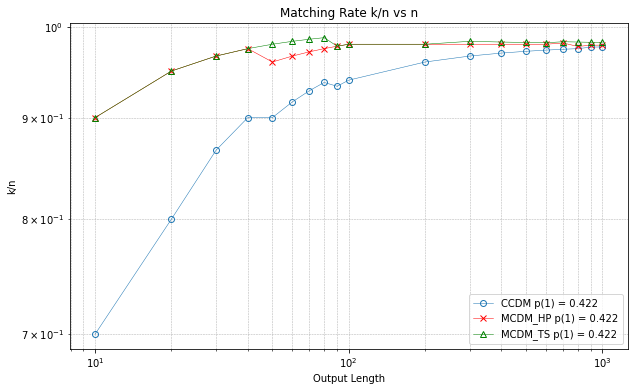

In [66]:
target_dis = 0.422
CCDM_rate = []
MCDM_HP_rate = []
MCDM_TS_rate = []
x_axis = np.concatenate((np.arange(10, 100, 10), np.arange(100, 1100, 100)), axis=0)
for x in x_axis: # For the x range (output_length)
  output_length = x

  # Number of 1's in a single codeword
  num1 = round(output_length * target_dis)
  # Empirical Distribution
  empirical_dis = num1 / output_length
  # Number of codewords
  cb_length = 2 ** (np.floor(np.log2(float(comb(output_length, num1)))))
  # Calculate Normalized KL
  CCDM_rate.append((np.log2(cb_length)) / output_length)

  ## MCDM with HP
  optim_HP = Optimizer("Probability", False)
  MCDM_HP_rate.append(optim_HP.optimize(output_length=output_length, p=target_dis)[1])

  ### MCDM with TS
  optim_TS = Optimizer("KL-Divergence", False)
  MCDM_TS_rate.append(optim_TS.optimize(output_length=output_length, p=target_dis)[1])

plt.figure(figsize=(10, 6))
plt.loglog(x_axis, CCDM_rate, linewidth=0.5, marker='o', markerfacecolor='none', label='CCDM p(1) = {target_dis}'.format(target_dis=target_dis))
plt.loglog(x_axis, MCDM_HP_rate, c='r', linewidth=0.5,  marker='x', markerfacecolor='none', label='MCDM_HP p(1) = {target}'.format(target=target_dis))
plt.loglog(x_axis, MCDM_TS_rate, c='green', linewidth=0.5, marker='^', markerfacecolor='none', label='MCDM_TS p(1) = {target}'.format(target=target_dis))
plt.xlabel("Output Length")
plt.ylabel("k/n")
plt.title("Matching Rate k/n vs n")
plt.grid(linestyle='--', linewidth=0.5, which='both')
plt.legend()

  
  

In [57]:
a = [3, 5, 6, 7, 2]
b = [123, 234, 32, 5, 33]
k = np.argmin(a)
b[k]

33